The Geometry of Data - Linear Algebra

Principal Component Analysis (PCA) on subset of data from scratch using only NumPy

1. Load the MNIST Dataset 📦

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load the full MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# The data is in the 'data' key, and the labels are in the 'target' key
X = mnist['data']
y = mnist['target'].astype(np.uint8) # The labels are strings, so we convert them to numbers

2. Filter for Digits '0', '1', and '8' 🎯

In [2]:
# Create a boolean mask for the digits we want
# This will be 'True' for every '0', '1', or '8', and 'False' otherwise
mask = (y == 0) | (y == 1) | (y == 8)

# Apply the mask to both our data and our labels
X_subset = X[mask]
y_subset = y[mask]

# Check the shape to see how many images we have now
print(f"Shape of the image subset: {X_subset.shape}")
print(f"Shape of the label subset: {y_subset.shape}")

Shape of the image subset: (21605, 784)
Shape of the label subset: (21605,)


3. Visualize a Few Digits (Optional but Recommended) 👀

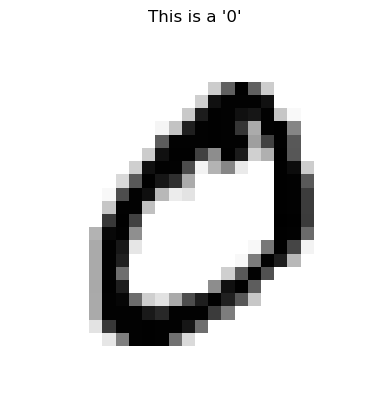

In [3]:
import matplotlib.pyplot as plt

# Let's pick an image from our new subset
some_digit_index = 0
some_digit_image = X_subset[some_digit_index]
some_digit_label = y_subset[some_digit_index]

# The images are stored as a flat array of 784 pixels.
# We need to reshape it into a 28x28 grid to view it.
some_digit_image_reshaped = some_digit_image.reshape(28, 28)

# Now, we can plot it
plt.imshow(some_digit_image_reshaped, cmap="binary")
plt.axis("off")
plt.title(f"This is a '{some_digit_label}'")
plt.show()

Standardize the Data


The first step is to standardize the data. PCA is sensitive to the variances of the initial variables. If there are large differences between the scales of the initial variables, those with larger scales will dominate the first principal component.

To standardize the data, you subtract the mean and divide by the standard deviation for each feature.

In [4]:
def standardize_data(X):
    """
    Standardizes the data, handling features with zero standard deviation.
    """
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X_std = np.nan_to_num(X_std)
    return X_std

Calculate the Covariance Matrix

The next step is to calculate the covariance matrix of the standardized data. The covariance matrix is a square matrix that represents the pairwise covariances between the different features of the data.

In [5]:
def get_covariance_matrix(X_std):
    """
    Calculates the covariance matrix of the standardized data.
    """
    covariance_matrix = np.cov(X_std, rowvar=False)
    return covariance_matrix

Compute the Eigenvectors and Eigenvalues


Next, you need to compute the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the principal components (the directions of maximum variance), and the eigenvalues represent the magnitude of the variance along those principal components.

In [6]:
def get_eigenvectors_and_eigenvalues(covariance_matrix):
    """
    Computes the eigenvectors and eigenvalues of the covariance matrix.
    """
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

Sort Eigenvectors by Eigenvalues


The eigenvectors need to be sorted in descending order based on their corresponding eigenvalues. The eigenvector with the highest eigenvalue is the first principal component.

In [7]:
def sort_eigenvectors_by_eigenvalues(eigenvalues, eigenvectors):
    """
    Sorts the eigenvectors by their corresponding eigenvalues in descending order.
    """
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

Choose the Number of Principal Components


You can decide how many principal components to keep based on the cumulative explained variance. A common approach is to keep enough principal components to explain a certain percentage of the total variance, often 95%.

In [8]:
def choose_num_components(eigenvalues, explained_variance_ratio_threshold=0.95):
    """
    Chooses the number of principal components to keep based on the cumulative explained variance.
    """
    cumulative_explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    n_components = np.argmax(cumulative_explained_variance >= explained_variance_ratio_threshold) + 1
    return n_components

Project the Data onto the New Feature Space


Finally, you project the original standardized data onto the new feature space defined by the selected principal components.

In [9]:
def project_data(X_std, eigenvectors, n_components):
    """
    Projects the data onto the new feature space defined by the principal components.
    """
    W = eigenvectors[:, :n_components]
    X_pca = X_std.dot(W)
    return X_pca

In [10]:
def pca_from_scratch(X, n_components=2):
    X_std = standardize_data(X)
    covariance_matrix = get_covariance_matrix(X_std)
    eigenvalues, eigenvectors = get_eigenvectors_and_eigenvalues(covariance_matrix)
    eigenvalues, eigenvectors = sort_eigenvectors_by_eigenvalues(eigenvalues, eigenvectors)
    X_pca = project_data(X_std, eigenvectors, n_components)
    return X_pca

print("Performing PCA on the subset...")

X_pca = pca_from_scratch(X_subset, n_components=2)

# Check the shape of our new, transformed data
print("Original data shape:", X_subset.shape)
print("Data shape after PCA:", X_pca.shape)
print("\nPCA completed successfully!")

Performing PCA on the subset...


C:\Users\kayya\AppData\Local\Temp\ipykernel_23336\1014364451.py:5: RuntimeWarning: invalid value encountered in divide
  X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


Original data shape: (21605, 784)
Data shape after PCA: (21605, 2)

PCA completed successfully!


Visualize the Results 🎨


Now for the most satisfying part! We'll use matplotlib to create a scatter plot of our new 2D data (X_pca). We'll color each point according to its original label (y_subset) to see if our PCA has successfully separated the different digit classes.

Plotting each digit class separately for full control...


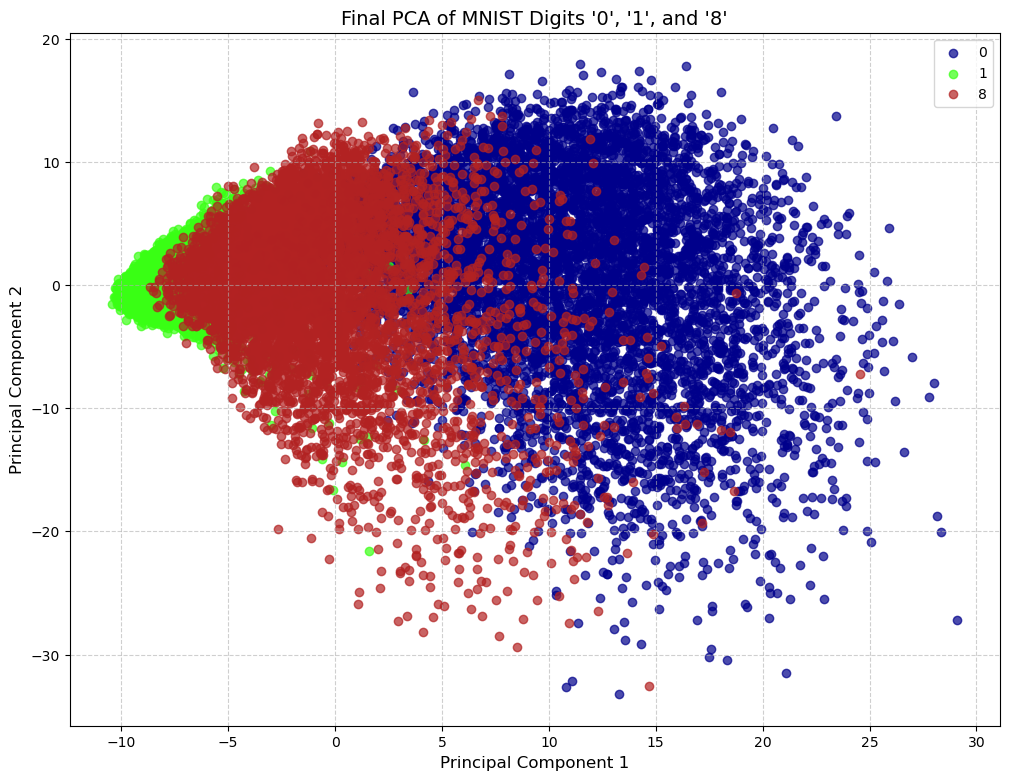

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# We assume X_pca and y_subset are already computed from the previous steps
# And we take the real part to be safe.
X_pca = np.real(X_pca)

print("Plotting each digit class separately for full control...")
plt.figure(figsize=(12, 9))

# Define the unique digits and the colors we want to use for them
digits = [0, 1, 8]
colors = ['#00008B', '#39FF14', '#B22222'] # Dark Blue, Neon Green, Firebrick Red

# Loop through each digit and plot it
for i, digit in enumerate(digits):
    # Create a mask to select only the data points for the current digit
    mask = (y_subset == digit)

    # Scatter plot for the current digit, using the specified color and label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i], label=str(digit), alpha=0.7)


# Add labels and a title
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("Final PCA of MNIST Digits '0', '1', and '8'", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
# Save the figure to a file FIRST
plt.savefig('pca_plot.png')
plt.show()